# SMOTE + Tomek Links

In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from numpy import where
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

Counter({0: 9900, 1: 100})


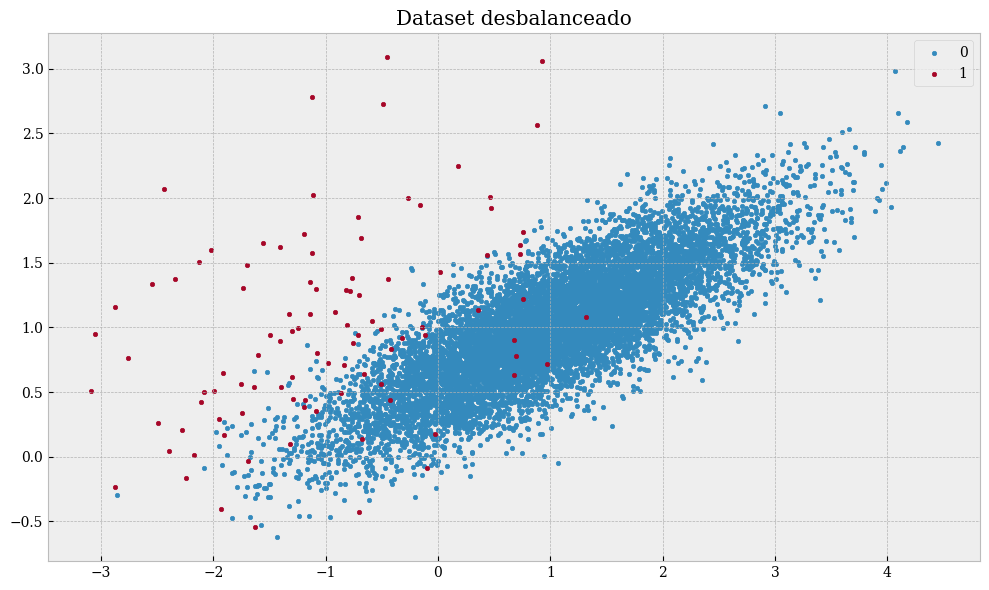

In [2]:
##########  DATASET DESBALANCEADO   #############
plt.style.use('default')
#plt.style.use('fivethirtyeight')
plt.style.use('bmh')
plt.rcParams['font.family'] = 'Serif'

plt.figure(figsize=(10,6))
# definir dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99],
                           flip_y=0, random_state=1)
counter = Counter(y)
print(counter)

# scatter plot dos exemplos por class label
for label, _ in counter.items():
  row_xi = where(y == label)[0]
  plt.scatter(X[row_xi, 0], X[row_xi, 1], 10,label = str(label))

#plt.grid(False)
plt.title('Dataset desbalanceado')
plt.legend()
plt.tight_layout()
plt.savefig('dsdesbalanceado.png')
plt.show()

Counter({0: 9900, 1: 8802})


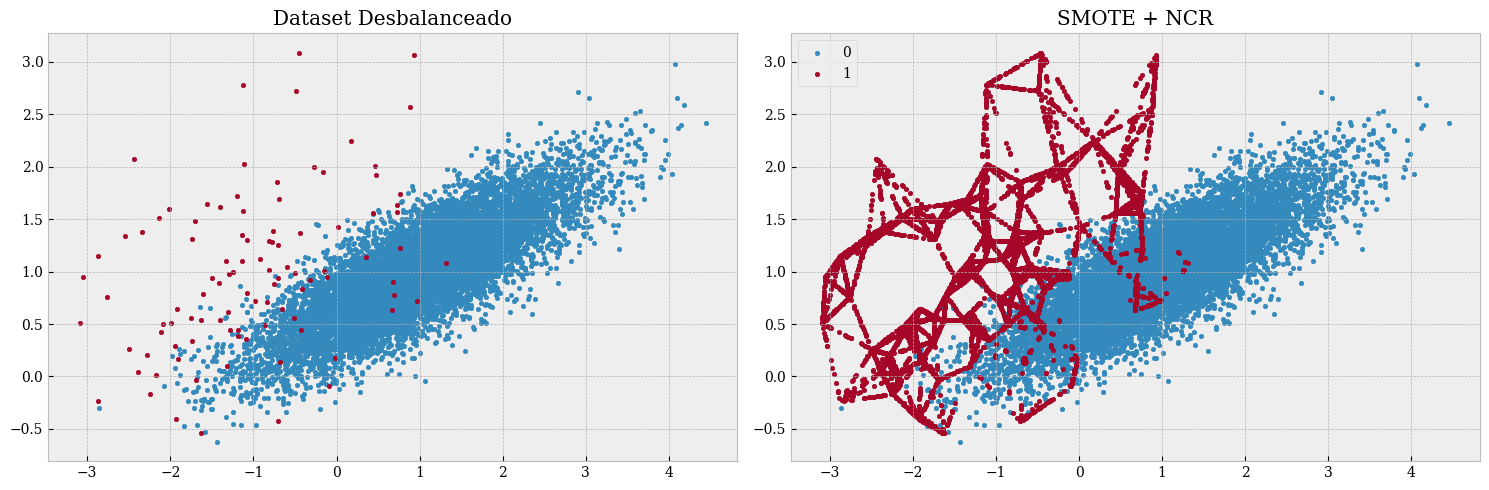

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for label, _ in counter.items():
  row_xi = where(y == label)[0]
  axs[0].scatter(X[row_xi, 0], X[row_xi, 1], 10,label = str(label))
axs[0].set_title('Dataset Desbalanceado')
#plt.legend()

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule

##########  APLICAR ENN   #############
oversampling = SMOTE()
undersampling = NeighbourhoodCleaningRule()
X_over, y_over = oversampling.fit_resample(X,y)
X_under, y_under = undersampling.fit_resample(X_over,y_over)

counter= Counter(y_under)
print(counter)

# scatter plot dos exemplos por class label
#plt.figure(figsize=(10,6))
for label, _ in counter.items():
  row_xi = where(y_under == label)[0]
  axs[1].scatter(X_under[row_xi, 0], X_under[row_xi, 1], 10, label = str(label))

#plt.grid(False)
axs[1].set_title('SMOTE + NCR')
plt.legend()
fig.tight_layout()
plt.show()

In [ ]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
# define model
model = DecisionTreeClassifier()

########### evaluate original dataset #########
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
original_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=1)
print('AUROC original DS: %.3f' % mean(original_scores))
###############################################

# define sampling
resample = SMOTE()
# define pipeline
pipeline = Pipeline(steps=[('r', resample), ('m', model)])
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('AUROC SMOTE: %.3f' % mean(scores))
# define sampling
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# define pipeline
pipeline = Pipeline(steps=[('r', resample), ('m', model)])
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('AUROC SMOTETomek: %.3f' % mean(scores))

AUROC original DS: 0.771
AUROC SMOTE: 0.826
AUROC SMOTETomek: 0.818


# SMOTE + ENN

Counter({1: 8961, 0: 8650})


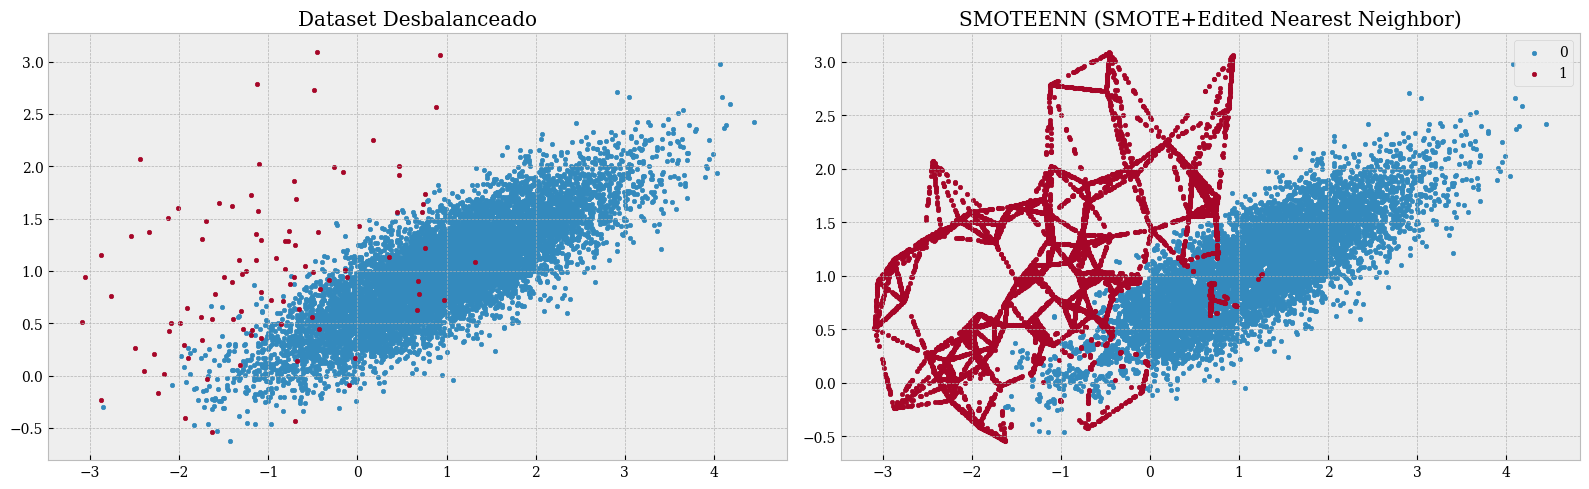

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

for label, _ in counter.items():
  row_xi = where(y == label)[0]
  axs[0].scatter(X[row_xi, 0], X[row_xi, 1], 10,label = str(label))
axs[0].set_title('Dataset Desbalanceado')

from imblearn.combine import NeighbourhoodCleaningRule

resample = SMOTEENN()
X_under, y_under = resample.fit_resample(X,y)

counter= Counter(y_under)
print(counter)

# scatter plot dos exemplos por class label
#plt.figure(figsize=(10,6))
for label, _ in counter.items():
  row_xi = where(y_under == label)[0]
  axs[1].scatter(X_under[row_xi, 0], X_under[row_xi, 1], 10, label = str(label))

#plt.grid(False)
axs[1].set_title('SMOTEENN (SMOTE+Edited Nearest Neighbor)')
plt.legend()
fig.tight_layout()
plt.show()

In [ ]:
print('AUROC original DS: %.3f' % mean(original_scores))

# define pipeline
pipeline = Pipeline(steps=[('r', resample), ('m', model)])
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('AUROC SMOTEENN: %.3f' % mean(scores))

AUROC original DS: 0.771
AUROC SMOTEENN: 0.830


# ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

Counter({0: 9900, 1: 9899})


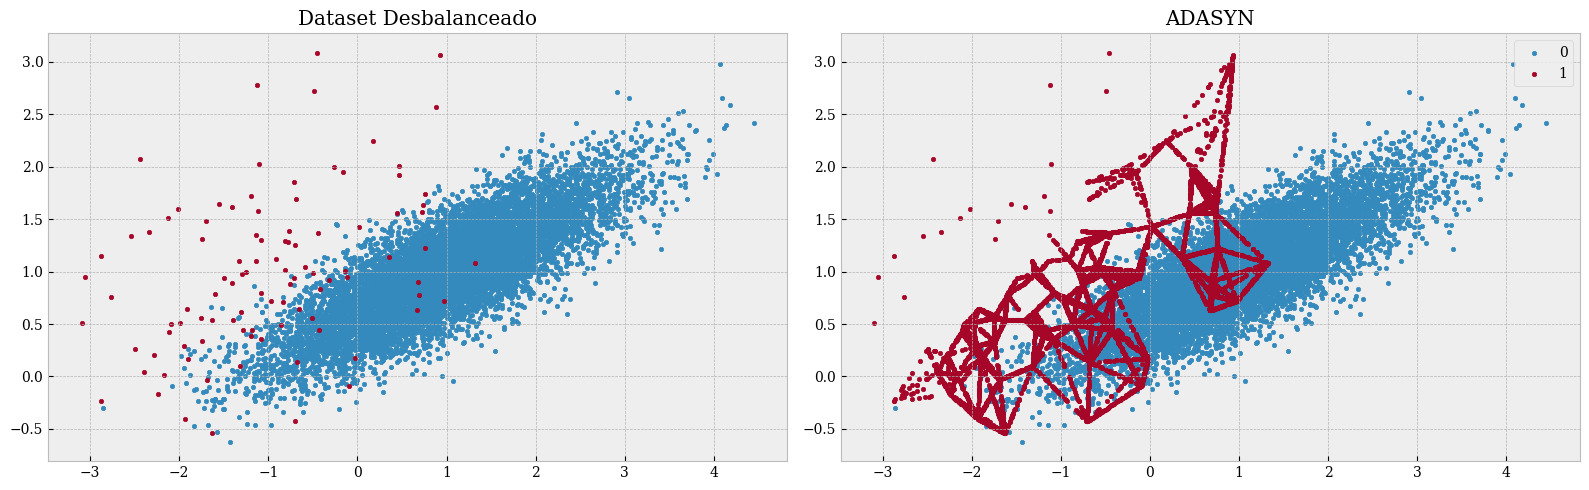

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

for label, _ in counter.items():
  row_xi = where(y == label)[0]
  axs[0].scatter(X[row_xi, 0], X[row_xi, 1], 10,label = str(label))
axs[0].set_title('Dataset Desbalanceado')

from imblearn.combine import SMOTEENN

resample = ADASYN()
X_under, y_under = resample.fit_resample(X,y)

counter= Counter(y_under)
print(counter)

# scatter plot dos exemplos por class label
#plt.figure(figsize=(10,6))
for label, _ in counter.items():
  row_xi = where(y_under == label)[0]
  axs[1].scatter(X_under[row_xi, 0], X_under[row_xi, 1], 10, label = str(label))

#plt.grid(False)
axs[1].set_title('ADASYN')
plt.legend()
fig.tight_layout()
plt.show()

In [ ]:
from imblearn.under_sampling._prototype_selection import EditedNearestNeighbours
print('AUROC original DS: %.3f' % mean(original_scores))

enn = EditedNearestNeighbours()
tomek = TomekLinks()
# define pipeline
pipelines = {'ADASYN': Pipeline(steps=[('r', resample), ('m', model)]),
             'ADASYN+ENN': Pipeline(steps=[('o', resample), ('u', enn), ('m', model)]),
             'ADASYN+Tomek': Pipeline(steps=[('o', resample), ('u', tomek), ('m', model)])
             }
for name, pipeline in pipelines.items():
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate model
  scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
  # summarize performance
  print(f'AUROC {name}: %.3f' % mean(scores))

AUROC original DS: 0.771
AUROC ADASYN: 0.814
AUROC ADASYN+ENN: 0.837
AUROC ADASYN+Tomek: 0.804
